<img src="https://miro.medium.com/max/647/1*ZOcUPrSXLYucFxppoI-dYg.png">

# Problem definition


For this project we are using a car dataset, where we want to predict the selling price of car based on its certain features.
Since we need to find the real value, with real calculation, therefore this problem is regression problem. 
We will be using linear regression to solve this problem.

General equation of Multiple Linear Regression:
$$y = \beta_0 + \beta_{1}x_1 + \beta_{2}x_2 + \beta_{3}x_3 + \beta_{4}x_4 + ... + \beta_{n}x_n$$

# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.options.display.max_columns = 130

In [4]:
df = pd.read_csv("final_scout_dummy.csv")
df

,price,km,hp,gears,age,previous_owners,inspection_new,displacement_cc,weight_kg,cons_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,...,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,make_model_Audi A1,make_model_Audi A2,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_Price negotiable,vat_VAT deductible,type_Demonstration,type_Employee's car,type_New,type_Pre-registered,type_Used,fuel_Benzine,fuel_Diesel,fuel_Electric,fuel_LPG/CNG,paint_type_Metallic,paint_type_Perl effect,paint_type_Uni/basic,upholstery_type_Cloth,upholstery_type_Part/Full Leather,gear_type_Automatic,gear_type_Manual,gear_type_Semi-automatic,drive_chain_4WD,drive_chain_front,drive_chain_rear
0,15770,56013.000000,66.0,7.0,3.0,2.0,1,1422.0,1220.0,3.8,1,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,...,0,0,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0
1,14500,80000.000000,141.0,7.0,2.0,2.0,0,1798.0,1255.0,5.6,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,...,0,0,1,1,1,0,1,1,0,0,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0
2,14640,83450.000000,85.0,7.0,3.0,1.0,0,1598.0,1135.0,3.8,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0
3,14500,73000.000000,66.0,6.0,3.0,1.0,0,1422.0,1195.0,3.8,0,1,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,1,1,0,1,1,1,1,1,0,1,1,0,0,0,0,0,0,...,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,0,0,0,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0
4,16790,16200.000000,66.0,7.0,3.0,1.0,1,1422.0,1135.0,4.1,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1,1,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,1,0,1,1

# Data Gathering

In [10]:
df.shape

(15915, 143)

In [12]:
df.info

<bound method DataFrame.info of        price            km     hp  gears  age  previous_owners  \
0      15770  56013.000000   66.0    7.0  3.0              2.0   
1      14500  80000.000000  141.0    7.0  2.0              2.0   
2      14640  83450.000000   85.0    7.0  3.0              1.0   
3      14500  73000.000000   66.0    6.0  3.0              1.0   
4      16790  16200.000000   66.0    7.0  3.0              1.0   
...      ...           ...    ...    ...  ...              ...   
15910  39950   1647.362609  147.0    6.0  0.0              1.0   
15911  39885   9900.000000  165.0    7.0  0.0              1.0   
15912  39875     15.000000  146.0    6.0  0.0              1.0   
15913  39700     10.000000  147.0    6.0  0.0              1.0   
15914  40999   1647.362609  165.0    6.0  0.0              1.0   

       inspection_new  displacement_cc  weight_kg  cons_comb  \
0                   1           1422.0     1220.0        3.8   
1                   0           1798.0     1255

In [14]:
df.describe()

,price,km,hp,gears,age,previous_owners,inspection_new,displacement_cc,weight_kg,cons_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,...,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,make_model_Audi A1,make_model_Audi A2,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_Price negotiable,vat_VAT deductible,type_Demonstration,type_Employee's car,type_New,type_Pre-registered,type_Used,fuel_Benzine,fuel_Diesel,fuel_Electric,fuel_LPG/CNG,paint_type_Metallic,paint_type_Perl effect,paint_type_Uni/basic,upholstery_type_Cloth,upholstery_type_Part/Full Leather,gear_type_Automatic,gear_type_Manual,gear_type_Semi-automatic,drive_chain_4WD,drive_chain_front,drive_chain_rear
count,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.00000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,...,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.000000,15915.00

# Data Preparation

In [15]:
X = df.drop("price",axis=1)
y = df["price"]

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (11140, 142)
Train target shape   :  (11140,)
Test features shape  :  (4775, 142)
Test target shape    :  (4775,)


In [21]:
X_train

,km,hp,gears,age,previous_owners,inspection_new,displacement_cc,weight_kg,cons_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,...,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,make_model_Audi A1,make_model_Audi A2,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_Price negotiable,vat_VAT deductible,type_Demonstration,type_Employee's car,type_New,type_Pre-registered,type_Used,fuel_Benzine,fuel_Diesel,fuel_Electric,fuel_LPG/CNG,paint_type_Metallic,paint_type_Perl effect,paint_type_Uni/basic,upholstery_type_Cloth,upholstery_type_Part/Full Leather,gear_type_Automatic,gear_type_Manual,gear_type_Semi-automatic,drive_chain_4WD,drive_chain_front,drive_chain_rear
11693,7800.000000,100.0,6.0,1.0,1.0,1,1598.0,1503.0,4.2,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,1,1,1,0,1,1,0,1,0,0,1,1,1,0,1,0,1,1,0,1,0,0,1,0,0,1,1,1,1,0,0,1,1,0,1,0,0,0,0,0,...,0,0,1,1,1,0,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0
6424,32500.000000,85.0,5.0,3.0,1.0,0,1598.0,1425.0,6.3,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0
8309,9196.000000,66.0,6.0,1.0,1.0,1,1398.0,1163.0,5.9,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,1,0,0,1,0,0,1,1,0,0,0,1,1,0,1,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0
14939,18000.000000,118.0,6.0,1.0,1.0,0,1598.0,1734.0,4.6,1,0,1,1,0,1,0,0,1,0,0,0,0,1,1,0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,1,1,0,1,0,0,1,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0,1,1,0,1,0,1,1,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0
10304,5.000000,51.0,5.0,0.0,1.0,1,1229.0,1163.0,5.5,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,1,0,0,0,0

In [22]:
X_test

,km,hp,gears,age,previous_owners,inspection_new,displacement_cc,weight_kg,cons_comb,cc_Air conditioning,cc_Air suspension,cc_Armrest,cc_Automatic climate control,cc_Auxiliary heating,cc_Cruise control,cc_Electric Starter,cc_Electric tailgate,cc_Electrical side mirrors,cc_Electrically adjustable seats,cc_Electrically heated windshield,cc_Heads-up display,cc_Heated steering wheel,cc_Hill Holder,cc_Keyless central door lock,cc_Leather seats,cc_Leather steering wheel,cc_Light sensor,cc_Lumbar support,cc_Massage seats,cc_Multi-function steering wheel,cc_Navigation system,cc_Panorama roof,cc_Park Distance Control,cc_Parking assist system camera,cc_Parking assist system self-steering,cc_Parking assist system sensors front,cc_Parking assist system sensors rear,cc_Power windows,cc_Rain sensor,cc_Seat heating,cc_Seat ventilation,cc_Split rear seats,cc_Start-stop system,cc_Sunroof,cc_Tinted windows,cc_Wind deflector,cc_Windshield,em_Bluetooth,em_CD player,em_Digital radio,em_Hands-free equipment,em_MP3,em_On-board computer,em_Radio,em_Sound system,em_Television,em_USB,ex_Alloy wheels,ex_Cab or rented Car,ex_Catalytic Converter,ex_Handicapped enabled,ex_Right hand drive,ex_Roof rack,ex_Shift paddles,ex_Ski bag,...,ss_Alarm system,ss_Blind spot monitor,ss_Central door lock,ss_Central door lock with remote control,ss_Daytime running lights,ss_Driver drowsiness detection,ss_Driver-side airbag,ss_Electronic stability control,ss_Emergency brake assistant,ss_Emergency system,ss_Fog lights,ss_Head airbag,ss_Immobilizer,ss_Isofix,ss_LED Daytime Running Lights,ss_LED Headlights,ss_Lane departure warning system,ss_Night view assist,ss_Passenger-side airbag,ss_Power steering,ss_Rear airbag,ss_Side airbag,ss_Tire pressure monitoring system,ss_Traction control,ss_Traffic sign recognition,ss_Xenon headlights,make_model_Audi A1,make_model_Audi A2,make_model_Audi A3,make_model_Opel Astra,make_model_Opel Corsa,make_model_Opel Insignia,make_model_Renault Clio,make_model_Renault Duster,make_model_Renault Espace,body_type_Compact,body_type_Convertible,body_type_Coupe,body_type_Off-Road,body_type_Sedans,body_type_Station wagon,body_type_Transporter,body_type_Van,vat_Price negotiable,vat_VAT deductible,type_Demonstration,type_Employee's car,type_New,type_Pre-registered,type_Used,fuel_Benzine,fuel_Diesel,fuel_Electric,fuel_LPG/CNG,paint_type_Metallic,paint_type_Perl effect,paint_type_Uni/basic,upholstery_type_Cloth,upholstery_type_Part/Full Leather,gear_type_Automatic,gear_type_Manual,gear_type_Semi-automatic,drive_chain_4WD,drive_chain_front,drive_chain_rear
12887,5900.0,100.0,6.0,0.0,1.0,1,1598.0,1487.0,4.8,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,1,1,0,1,0,1,1,0,0,1,0,1,1,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
8140,133.0,66.0,5.0,0.0,1.0,0,999.0,1273.0,4.9,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,1,1,0,0,1,0,0,0,0,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0,1,0,1,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0
6835,8000.0,77.0,5.0,2.0,1.0,0,998.0,1273.0,4.9,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,1,1,1,0,0,0,1,1,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0
15439,15.0,118.0,6.0,0.0,1.0,1,1997.0,1734.0,5.1,1,0,1,1,0,1,0,0,1,0,1,1,0,0,0,0,1,1,0,0,1,1,0,1,1,0,1,1,1,1,1,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,...,0,1,1,0,1,0,1,1,1,0,0,0,1,1,1,1,1,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0
1213,11903.0,60.0,5.0,2.0,1.0,0,999.0,1135.0,4.2,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,1,0,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0,1,0,1,1,0,0,0,0,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0

In [23]:
y_train

11693    18480
6424     10980
8309     13480
14939    24999
10304    10490
         ...  
13418     7490
5390     24980
860      20500
15795    39550
7270     15450
Name: price, Length: 11140, dtype: int64

In [24]:
y_test

12887    26379
8140     18990
6835     12490
15439    32975
1213     15888
         ...  
3409     20000
6201     10200
1718     16669
12179    21350
10812    12700
Name: price, Length: 4775, dtype: int64

In [25]:
from sklearn.linear_model import LinearRegression

In [63]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
scaler = MinMaxScaler() 

In [64]:
scaler.fit(X_train) 

MinMaxScaler()

In [65]:
X_train_scaled= scaler.transform(X_train)
X_train_scaled

array([[0.02460568, 0.23622047, 0.33333333, ..., 0.        , 1.        ,
        0.        ],
       [0.10252366, 0.17716535, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.02900946, 0.1023622 , 0.33333333, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.04544164, 0.1023622 , 0.66666667, ..., 0.        , 1.        ,
        0.        ],
       [0.00519673, 0.42125984, 0.33333333, ..., 0.        , 1.        ,
        0.        ],
       [0.08922713, 0.20472441, 0.33333333, ..., 0.        , 1.        ,
        0.        ]])

In [66]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[1.86119874e-02, 2.36220472e-01, 3.33333333e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [4.19558360e-04, 1.02362205e-01, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [2.52365931e-02, 1.45669291e-01, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [3.14511041e-02, 7.87401575e-02, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [8.51735016e-02, 3.34645669e-01, 3.33333333e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [2.20820189e-01, 2.36220472e-01, 3.33333333e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [67]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

In [68]:
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [69]:
y_pred = lm.predict(X_test_scaled) 
y_train_pred = lm.predict(X_train_scaled) 

In [70]:
my_dict = {"Actual": y_test, "pred": y_pred, "residual": y_test-y_pred}
compare = pd.DataFrame(my_dict)
compare.head(20)

,Actual,pred,residual
12887,26379,25350.75,1028.25
8140,18990,18906.25,83.75
6835,12490,12474.50,15.50
15439,32975,35135.00,-2160.00
1213,15888,14319.50,1568.50
13187,15480,14916.25,563.75
1034,20500,22688.75,-2188.75
2864,16760,15667.75,1092.25
7061,18990,17851.75,1138.25
14983,27000,24457.00,2543.00


In [71]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [72]:
def train_val(y_train, y_train_pred, y_test, y_pred, i):
    
    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [73]:
pd.options.display.float_format = '{:.8f}'.format
ls =train_val(y_train, y_train_pred, y_test, y_pred, "linear")
ls

,linear_train,linear_test
R2,0.89171006,-588119210911949.87500000
mae,1691.97446140,2588580368.63549757
mse,5904051.28329219,31996029945376338345984.00000000
rmse,2429.82536066,178874341215.77175903


In [74]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [75]:
eval_metric(y_train, y_train_pred)

Model testing performance:
--------------------------
R2_score 	: 0.8917100569816341
MAE 		: 1691.9744614003591
MSE 		: 5904051.28329219
RMSE 		: 2429.8253606570556


In [76]:
pd.options.display.float_format = '{:.8f}'.format
eval_metric(y_test, y_pred)

Model testing performance:
--------------------------
R2_score 	: -588119210911949.9
MAE 		: 2588580368.6354976
MSE 		: 3.199602994537634e+22
RMSE 		: 178874341215.77176


In [77]:
def adj_r2(y_test, y_pred, df):
    r2 = r2_score(y_test, y_pred)
    n = df.shape[0]   # number of observations
    p = df.shape[1]-1 # number of independent variables 
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2

In [78]:
adj_r2(y_test, y_pred, df)

-593414222828605.9

In [79]:
residuals = y_test-y_pred

In [80]:
from sklearn.model_selection import cross_validate, cross_val_score

In [81]:
lcm = LinearRegression()
scores = cross_validate(lcm, X_train, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 5)

In [82]:
pd.DataFrame(scores, index = range(1,6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.06401324,0.01000357,0.88578387,-1745.23039855,-6211466.66356216,-2492.28141741
2,0.05301166,0.00800109,0.88438945,-1727.80119259,-6114728.11535599,-2472.79762928
3,0.04801130,0.00600052,0.88777074,-1673.89077285,-5624002.61185923,-2371.49796792
4,0.05101418,0.00900197,0.88821180,-1774.97167822,-6958522.77752415,-2637.90120693
5,0.05001211,0.00699997,0.88792036,-1687.08403412,-5927209.74664462,-2434.58615511


In [83]:
scores = pd.DataFrame(scores, index=range(1,6))
scores.iloc[:, 2:].mean()

test_r2                                   0.88681525
test_neg_mean_absolute_error          -1721.79561526
test_neg_mean_squared_error        -6167185.98298923
test_neg_root_mean_squared_error      -2481.81287533
dtype: float64

In [84]:
pd.options.display.float_format = '{:.8f}'.format
train_val(y_train, y_train_pred, y_test, y_pred, "linear")


,linear_train,linear_test
R2,0.89171006,-588119210911949.87500000
mae,1691.97446140,2588580368.63549757
mse,5904051.28329219,31996029945376338345984.00000000
rmse,2429.82536066,178874341215.77175903


In [85]:
lm.coef_

array([-1.14206753e+04,  2.37218681e+04,  1.89005755e+03, -4.82117262e+03,
       -4.21882055e+02, -2.53844201e+02, -1.11125099e+03, -2.29657572e+03,
        7.64755382e+02,  2.36552379e+02, -6.35314707e+02,  3.48882908e+01,
        2.29328338e+02, -2.62132290e+02,  2.39207526e+02, -1.25763770e+03,
       -4.23744406e+01,  5.05788020e+01,  1.01552407e+02,  3.76914620e+02,
        2.45159682e+03,  3.05442017e+02,  1.43858724e+02,  1.25813010e+02,
       -5.02950822e+02,  1.68142713e+02,  1.29079623e+02, -3.93519067e+02,
        4.20315308e+02,  1.59383189e+02,  3.14782105e+02, -1.79668966e+02,
        7.03352450e+02, -1.77989715e+01,  9.78462111e+02,  3.25237031e+02,
       -5.67239604e+02,  5.68456605e+01, -2.63573914e+02,  3.02721668e+01,
        9.14771183e+02, -2.09415010e+02,  7.66298040e+00,  5.41805676e+02,
        6.18934556e+01, -1.12166497e+03, -2.75397414e+02, -4.65132150e+02,
        8.68379664e+01,  7.97988016e+02, -8.02762259e+01,  2.93913149e+01,
       -1.08621552e+01,  

In [86]:
lm_df = pd.DataFrame(lm.coef_, columns = ["lm_coef"])
lm_df.head(5)

,lm_coef
0,-11420.67529522
1,23721.86813666
2,1890.05755268
3,-4821.17262444
4,-421.88205534


In [87]:
from sklearn.linear_model import Ridge

In [88]:
ridge_model = Ridge(alpha=1, random_state=42)

In [89]:
ridge_model.fit(X_train_scaled, y_train)

Ridge(alpha=1, random_state=42)

In [90]:
y_pred = ridge_model.predict(X_test_scaled)
y_train_pred = ridge_model.predict(X_train_scaled)

In [91]:
pd.options.display.float_format = '{:.8f}'.format
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
rs

,ridge_train,ridge_test
R2,0.89163005,0.88538733
mae,1690.31012643,1752.16571911
mse,5908413.12430614,6235385.99486790
rmse,2430.72275760,2497.07548842


In [92]:
pd.concat([ls, rs], axis=1)

,linear_train,linear_test,ridge_train,ridge_test
R2,0.89171006,-588119210911949.87500000,0.89163005,0.88538733
mae,1691.97446140,2588580368.63549757,1690.31012643,1752.16571911
mse,5904051.28329219,31996029945376338345984.00000000,5908413.12430614,6235385.99486790
rmse,2429.82536066,178874341215.77175903,2430.72275760,2497.07548842


In [93]:
model = Ridge(alpha=1, random_state=42)
scores = cross_validate(model, X_train_scaled, y_train,
                    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [94]:
pd.DataFrame(scores, index = range(1, 6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.02603436,0.00200248,0.88581093,-1740.32901289,-6209995.35982382,-2491.98622786
2,0.03000855,0.00300097,0.88457163,-1722.85460072,-6105092.47317771,-2470.84853303
3,0.03200459,0.00200176,0.88837855,-1672.28675777,-5593544.32089516,-2365.06750874
4,0.03000665,0.00200105,0.88789922,-1773.72732839,-6977980.18424233,-2641.58667930
5,0.02400565,0.00200033,0.88961712,-1680.86755531,-5837478.41737218,-2416.08741923


In [95]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:].mean()

test_r2                                   0.88725549
test_neg_mean_absolute_error          -1718.01305101
test_neg_mean_squared_error        -6144818.15110224
test_neg_root_mean_squared_error      -2477.11527363
dtype: float64

In [96]:
train_val(y_train, y_train_pred, y_test, y_pred, "ridge")

,ridge_train,ridge_test
R2,0.89163005,0.88538733
mae,1690.31012643,1752.16571911
mse,5908413.12430614,6235385.99486790
rmse,2430.72275760,2497.07548842


<AxesSubplot:>

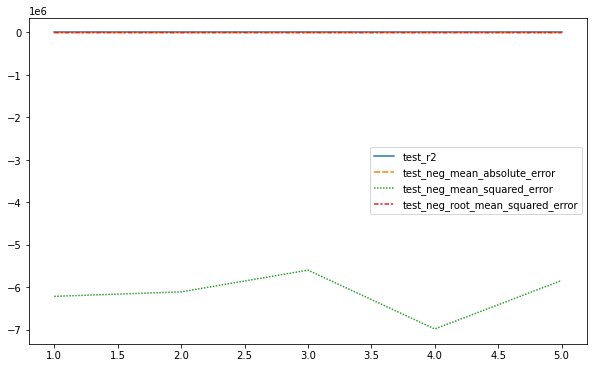

In [97]:
sns.lineplot(data = scores.iloc[:,2:])

In [98]:
ridge_model.coef_

array([-1.11751424e+04,  2.23892593e+04,  1.87818197e+03, -4.87156621e+03,
       -3.78210944e+02, -2.60843616e+02, -6.40340636e+02, -2.05233166e+03,
        9.23158730e+02,  2.48082257e+02, -5.69069539e+02,  3.58517938e+01,
        2.26425420e+02, -2.72562393e+02,  2.38195392e+02, -6.11595552e+02,
       -3.67534051e+01,  4.80880753e+01,  1.01342874e+02,  3.64222011e+02,
        2.44365175e+03,  2.88519388e+02,  1.42166707e+02,  1.28284943e+02,
       -4.23727756e+02,  1.64783717e+02,  1.34358001e+02, -3.99169919e+02,
        4.27008665e+02,  1.58927136e+02,  3.21494304e+02, -1.71778610e+02,
        7.13506025e+02, -1.56407236e+01,  9.73529038e+02,  3.19187907e+02,
       -5.73018700e+02,  5.78358989e+01, -2.55022371e+02,  4.10277925e+01,
        9.07875300e+02, -2.04298689e+02,  2.52949814e+01,  5.60086683e+02,
        5.64927080e+01, -1.13382830e+03, -2.65119793e+02, -4.64944983e+02,
        8.11017208e+01,  8.06563139e+02, -7.58967980e+01,  2.46137842e+01,
       -1.35161427e+01,  

In [99]:
rm_df = pd.DataFrame(ridge_model.coef_, columns = ["ridge_coef_1"])

In [100]:
pd.concat([lm_df,rm_df], axis = 1)

,lm_coef,ridge_coef_1
0,-11420.67529522,-11175.14240383
1,23721.86813666,22389.25930352
2,1890.05755268,1878.18197430
3,-4821.17262444,-4871.56621488
4,-421.88205534,-378.21094430
...,...,...
137,-205405776076969.50000000,-1647.19141674
138,-205405776073379.15625000,2019.12699115
139,88418281383613.26562500,2145.86709789
140,88418281381359.34375000,-89.89178872


In [101]:
from sklearn.linear_model import RidgeCV

In [102]:
alpha_space = np.linspace(0.01, 1, 100)
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [103]:
ridge_cv_model = RidgeCV(alphas=alpha_space, cv = 5, scoring= "neg_root_mean_squared_error")

In [104]:
ridge_cv_model.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, scoring='neg_root_mean_squared_error')

In [105]:
ridge_cv_model.alpha_

1.0

In [106]:
ridge_cv_model.best_score_ 

-2477.1152736310933

In [107]:
y_pred = ridge_cv_model.predict(X_test_scaled)
y_train_pred = ridge_cv_model.predict(X_train_scaled)

In [108]:
rcs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge_cv")
rcs

,ridge_cv_train,ridge_cv_test
R2,0.89163005,0.88538733
mae,1690.31012643,1752.16571911
mse,5908413.12430614,6235385.99486790
rmse,2430.72275760,2497.07548842


In [109]:
pd.concat([ls, rs, rcs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test
R2,0.89171006,-588119210911949.87500000,0.89163005,0.88538733,0.89163005,0.88538733
mae,1691.97446140,2588580368.63549757,1690.31012643,1752.16571911,1690.31012643,1752.16571911
mse,5904051.28329219,31996029945376338345984.00000000,5908413.12430614,6235385.99486790,5908413.12430614,6235385.99486790
rmse,2429.82536066,178874341215.77175903,2430.72275760,2497.07548842,2430.72275760,2497.07548842


In [110]:
ridge_cv_model.coef_

array([-1.11751424e+04,  2.23892593e+04,  1.87818197e+03, -4.87156621e+03,
       -3.78210944e+02, -2.60843616e+02, -6.40340636e+02, -2.05233166e+03,
        9.23158730e+02,  2.48082257e+02, -5.69069539e+02,  3.58517938e+01,
        2.26425420e+02, -2.72562393e+02,  2.38195392e+02, -6.11595552e+02,
       -3.67534051e+01,  4.80880753e+01,  1.01342874e+02,  3.64222011e+02,
        2.44365175e+03,  2.88519388e+02,  1.42166707e+02,  1.28284943e+02,
       -4.23727756e+02,  1.64783717e+02,  1.34358001e+02, -3.99169919e+02,
        4.27008665e+02,  1.58927136e+02,  3.21494304e+02, -1.71778610e+02,
        7.13506025e+02, -1.56407236e+01,  9.73529038e+02,  3.19187907e+02,
       -5.73018700e+02,  5.78358989e+01, -2.55022371e+02,  4.10277925e+01,
        9.07875300e+02, -2.04298689e+02,  2.52949814e+01,  5.60086683e+02,
        5.64927080e+01, -1.13382830e+03, -2.65119793e+02, -4.64944983e+02,
        8.11017208e+01,  8.06563139e+02, -7.58967980e+01,  2.46137842e+01,
       -1.35161427e+01,  

In [111]:
rcm_df = pd.DataFrame(ridge_cv_model.coef_, columns=["ridge_cv_coef_1"])

In [112]:
pd.concat([lm_df,rm_df, rcm_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_cv_coef_1
0,-11420.67529522,-11175.14240383,-11175.14240383
1,23721.86813666,22389.25930352,22389.25930352
2,1890.05755268,1878.18197430,1878.18197430
3,-4821.17262444,-4871.56621488,-4871.56621488
4,-421.88205534,-378.21094430,-378.21094430
...,...,...,...
137,-205405776076969.50000000,-1647.19141674,-1647.19141674
138,-205405776073379.15625000,2019.12699115,2019.12699115
139,88418281383613.26562500,2145.86709789,2145.86709789
140,88418281381359.34375000,-89.89178872,-89.89178872


In [113]:
from sklearn.linear_model import Lasso, LassoCV

In [114]:
lasso_model = Lasso(alpha=1, random_state=42)
lasso_model.fit(X_train_scaled, y_train)

Lasso(alpha=1, random_state=42)

In [115]:
y_pred = lasso_model.predict(X_test_scaled)
y_train_pred = lasso_model.predict(X_train_scaled)

In [116]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso")
lss

,lasso_train,lasso_test
R2,0.89135021,0.88527183
mae,1692.56420844,1753.06012494
mse,5923670.25397321,6241669.62009442
rmse,2433.85912780,2498.33336849


In [117]:
pd.concat([ls, rs, rcs, lss], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test
R2,0.89171006,-588119210911949.87500000,0.89163005,0.88538733,0.89163005,0.88538733,0.89135021,0.88527183
mae,1691.97446140,2588580368.63549757,1690.31012643,1752.16571911,1690.31012643,1752.16571911,1692.56420844,1753.06012494
mse,5904051.28329219,31996029945376338345984.00000000,5908413.12430614,6235385.99486790,5908413.12430614,6235385.99486790,5923670.25397321,6241669.62009442
rmse,2429.82536066,178874341215.77175903,2430.72275760,2497.07548842,2430.72275760,2497.07548842,2433.85912780,2498.33336849


In [118]:
lasso_model.coef_

array([-1.12165242e+04,  2.31668668e+04,  1.83349733e+03, -4.87850127e+03,
       -1.97693108e+02, -2.46817740e+02, -6.97893993e+02, -1.71131339e+03,
        6.05055552e+02,  2.26892296e+02, -3.37236713e+02,  4.11706363e+01,
        2.24499914e+02, -2.21985299e+02,  2.39804488e+02, -0.00000000e+00,
       -0.00000000e+00,  4.80068942e+01,  9.11897658e+01,  3.56154849e+02,
        2.41787201e+03,  2.88248946e+02,  1.40592277e+02,  1.21274251e+02,
       -0.00000000e+00,  1.68910579e+02,  1.14536263e+02, -3.96141223e+02,
        3.57889555e+02,  1.36612238e+02,  3.21262582e+02, -1.11326742e+02,
        6.92063769e+02, -7.08393110e+00,  9.74526799e+02,  3.06133172e+02,
       -5.35481867e+02,  4.35146996e+01, -2.34701558e+02,  3.13494632e+01,
        8.82978880e+02, -1.84553457e+02,  1.21830595e+00,  5.42615123e+02,
        8.99416781e+00, -7.81961009e+02, -0.00000000e+00, -4.52899826e+02,
        8.07456826e+01,  7.97898852e+02, -7.35119563e+01,  1.25550722e+01,
       -0.00000000e+00,  

In [119]:
model = Lasso(alpha=1, random_state=42)
scores = cross_validate(model, X_train_scaled, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [120]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.37832832,0.00200176,0.88638114,-1738.67204812,-6178985.40200075,-2485.75650497
2,0.32135725,0.00299835,0.88477898,-1722.71777869,-6094125.98198762,-2468.62836044
3,0.32526660,0.00200081,0.88916472,-1669.45126526,-5554147.88852281,-2356.72397377
4,0.32551146,0.00300312,0.88800093,-1775.39216785,-6971648.85403382,-2640.38801202
5,0.32307386,0.00300384,0.89047734,-1675.44232314,-5791986.83717844,-2406.65469837


In [121]:
scores.iloc[:,2:].mean()

test_r2                                   0.88776062
test_neg_mean_absolute_error          -1716.33511661
test_neg_mean_squared_error        -6118178.99274469
test_neg_root_mean_squared_error      -2471.63030991
dtype: float64

In [122]:
train_val(y_train, y_train_pred, y_test, y_pred, "lasso")

,lasso_train,lasso_test
R2,0.89135021,0.88527183
mae,1692.56420844,1753.06012494
mse,5923670.25397321,6241669.62009442
rmse,2433.85912780,2498.33336849


In [123]:
lasso_model.coef_

array([-1.12165242e+04,  2.31668668e+04,  1.83349733e+03, -4.87850127e+03,
       -1.97693108e+02, -2.46817740e+02, -6.97893993e+02, -1.71131339e+03,
        6.05055552e+02,  2.26892296e+02, -3.37236713e+02,  4.11706363e+01,
        2.24499914e+02, -2.21985299e+02,  2.39804488e+02, -0.00000000e+00,
       -0.00000000e+00,  4.80068942e+01,  9.11897658e+01,  3.56154849e+02,
        2.41787201e+03,  2.88248946e+02,  1.40592277e+02,  1.21274251e+02,
       -0.00000000e+00,  1.68910579e+02,  1.14536263e+02, -3.96141223e+02,
        3.57889555e+02,  1.36612238e+02,  3.21262582e+02, -1.11326742e+02,
        6.92063769e+02, -7.08393110e+00,  9.74526799e+02,  3.06133172e+02,
       -5.35481867e+02,  4.35146996e+01, -2.34701558e+02,  3.13494632e+01,
        8.82978880e+02, -1.84553457e+02,  1.21830595e+00,  5.42615123e+02,
        8.99416781e+00, -7.81961009e+02, -0.00000000e+00, -4.52899826e+02,
        8.07456826e+01,  7.97898852e+02, -7.35119563e+01,  1.25550722e+01,
       -0.00000000e+00,  

In [124]:
lsm_df = pd.DataFrame(lasso_model.coef_, columns = ["lasso_coef_1"])

In [125]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_cv_coef_1,lasso_coef_1
0,-11420.67529522,-11175.14240383,-11175.14240383,-11216.52424277
1,23721.86813666,22389.25930352,22389.25930352,23166.86676801
2,1890.05755268,1878.18197430,1878.18197430,1833.49733372
3,-4821.17262444,-4871.56621488,-4871.56621488,-4878.50127158
4,-421.88205534,-378.21094430,-378.21094430,-197.69310819
...,...,...,...,...
137,-205405776076969.50000000,-1647.19141674,-1647.19141674,-1269.39347303
138,-205405776073379.15625000,2019.12699115,2019.12699115,2368.00810055
139,88418281383613.26562500,2145.86709789,2145.86709789,2104.52909808
140,88418281381359.34375000,-89.89178872,-89.89178872,-0.00000000


In [126]:
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 5, max_iter=100000, random_state=42)

In [127]:
lasso_cv_model.fit(X_train_scaled, y_train)

LassoCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
        cv=5, max_iter=100000, random_state=42)

In [128]:
lasso_cv_model.alpha_

1.0

In [129]:
alpha_space

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])

In [130]:
lasso_cv_model.mse_path_.mean()

6133734.496293867

In [131]:
y_pred = lasso_cv_model.predict(X_test_scaled)   #Lasso(alpha =0.01)
y_train_pred = lasso_cv_model.predict(X_train_scaled)

In [132]:
lcs = train_val(y_train, y_train_pred, y_test, y_pred, "lasso_cv")
lcs


,lasso_cv_train,lasso_cv_test
R2,0.89135021,0.88527183
mae,1692.56420844,1753.06012494
mse,5923670.25397321,6241669.62009442
rmse,2433.85912780,2498.33336849


In [133]:
pd.concat([ls,rs, rcs, lss, lcs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test
R2,0.89171006,-588119210911949.87500000,0.89163005,0.88538733,0.89163005,0.88538733,0.89135021,0.88527183,0.89135021,0.88527183
mae,1691.97446140,2588580368.63549757,1690.31012643,1752.16571911,1690.31012643,1752.16571911,1692.56420844,1753.06012494,1692.56420844,1753.06012494
mse,5904051.28329219,31996029945376338345984.00000000,5908413.12430614,6235385.99486790,5908413.12430614,6235385.99486790,5923670.25397321,6241669.62009442,5923670.25397321,6241669.62009442
rmse,2429.82536066,178874341215.77175903,2430.72275760,2497.07548842,2430.72275760,2497.07548842,2433.85912780,2498.33336849,2433.85912780,2498.33336849


In [134]:
lasso_cv_model.coef_

array([-1.12165242e+04,  2.31668668e+04,  1.83349733e+03, -4.87850127e+03,
       -1.97693108e+02, -2.46817740e+02, -6.97893993e+02, -1.71131339e+03,
        6.05055552e+02,  2.26892296e+02, -3.37236713e+02,  4.11706363e+01,
        2.24499914e+02, -2.21985299e+02,  2.39804488e+02, -0.00000000e+00,
       -0.00000000e+00,  4.80068942e+01,  9.11897658e+01,  3.56154849e+02,
        2.41787201e+03,  2.88248946e+02,  1.40592277e+02,  1.21274251e+02,
       -0.00000000e+00,  1.68910579e+02,  1.14536263e+02, -3.96141223e+02,
        3.57889555e+02,  1.36612238e+02,  3.21262582e+02, -1.11326742e+02,
        6.92063769e+02, -7.08393110e+00,  9.74526799e+02,  3.06133172e+02,
       -5.35481867e+02,  4.35146996e+01, -2.34701558e+02,  3.13494632e+01,
        8.82978880e+02, -1.84553457e+02,  1.21830595e+00,  5.42615123e+02,
        8.99416781e+00, -7.81961009e+02, -0.00000000e+00, -4.52899826e+02,
        8.07456826e+01,  7.97898852e+02, -7.35119563e+01,  1.25550722e+01,
       -0.00000000e+00,  

In [135]:
lcm_df = pd.DataFrame(lasso_cv_model.coef_, columns = ["lasso_cv_coef_0.01"])